In [1]:
from collections import defaultdict
import os

# Custom module imports
from ehr import HealthRecord
import utils

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Spacy imports
import scispacy
from spacy import displacy
import en_ner_bc5cdr_md


In [7]:
DATA_DIR = './n2c2_2018/train/'

# Get all the file IDs
file_ids = sorted(list(set(['.'.join(fname.split('.')[:-1]) for fname in os.listdir(DATA_DIR)])))



### EDA

In [8]:
tags = []
data = []

for fid in file_ids:
    record = HealthRecord(fid, text_path = DATA_DIR + fid + '.txt', 
                          ann_path = DATA_DIR + fid + '.ann')
    tags.append(record.get_annotations())
    data.append(record)


In [9]:
# Entity example
data[0].entities['T1']



ID: T1
Entity name: Reason
Character range: 10179 10197
Entity text: 'recurrent seizures'

In [10]:
# Relation example
data[0].relations['R1']



ID: R1
Relation type: Reason-Drug

Entity 1: 

ID: T1
Entity name: Reason
Character range: 10179 10197
Entity text: 'recurrent seizures'

Entity 2: 

ID: T3
Entity name: Drug
Character range: 10227 10233
Entity text: 'ativan'

In [11]:
# Getting counts for different entities
entity_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['entities'].items():
        entity_counts[value.name] += 1
        
# Convert defaultdict to dict
entity_counts = dict(entity_counts)

# Sort by value
entity_counts = {key: value for key, value in sorted(entity_counts.items(), 
                                                     key = lambda x: x[1], 
                                                     reverse = True)}

In [12]:
# Gettings counts for different relations
relation_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['relations'].items():
        relation_counts[value.name] += 1
        
# Convert defaultdict to dict
relation_counts = dict(relation_counts)

# Sort by value
relation_counts = {key: value for key, value in sorted(relation_counts.items(), 
                                                       key = lambda x: x[1],
                                                       reverse = True)}


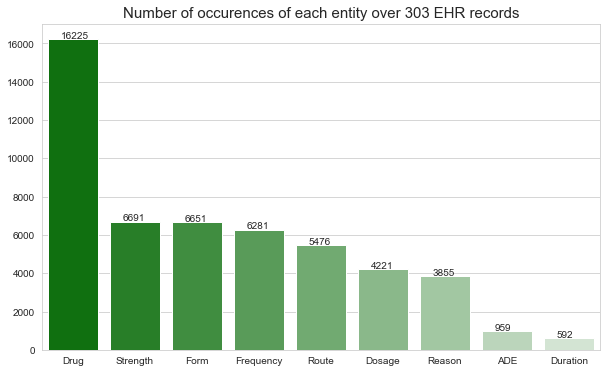

In [14]:
plt.figure(figsize = (10, 6))

sns.barplot(x = list(entity_counts.keys()), y = list(entity_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

# Annotating counts
for i in range(len(entity_counts.values())):
    plt.text(x = i - 0.2, y = list(entity_counts.values())[i] + 40, 
             s = list(entity_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of each entity over 303 EHR records', fontsize = 15)
plt.savefig('./plots/entity_counts.jpg')
plt.show()



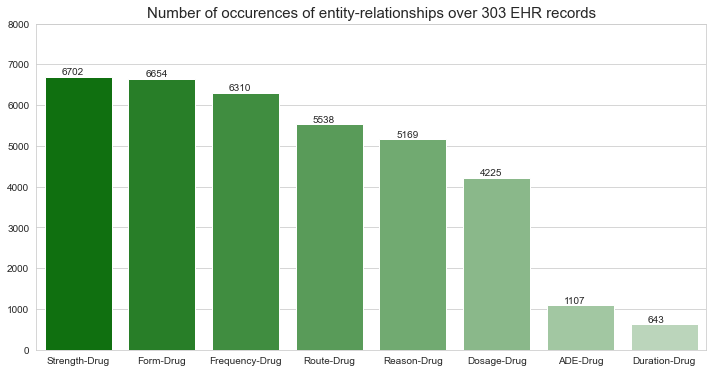

In [15]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(relation_counts.keys()), y = list(relation_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

plt.ylim(0, 8000)

# Annotating counts
for i in range(len(relation_counts.values())):
    plt.text(x = i - 0.2, y = list(relation_counts.values())[i] + 40, 
             s = list(relation_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of entity-relationships over 303 EHR records', fontsize = 15)
plt.savefig('./plots/relation_counts.jpg')
plt.show()

In [16]:
nlp = en_ner_bc5cdr_md.load()


In [17]:
doc = nlp(data[0].text)

colors = {"DISEASE":"#D7BDE2", "CHEMICAL":"#F9E79F"}
options = {"ents":["DISEASE", "CHEMICAL"], "colors":colors}
displacy.render(doc, style = "ent", jupyter=True, options = options)



### Custom-built entity highlighter

In [18]:
utils.display_ehr(data[0].text, data[0].get_entities())
